In [294]:
import pyfolio as pf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [295]:
portfolio = pd.read_csv("financial.csv", parse_dates=['Date'], index_col='Date')
portfolio_returns = portfolio.pct_change()

In [296]:
X_train, X_test, y_train, y_test = train_test_split(portfolio, portfolio, test_size=0.30, shuffle=False)

In [307]:
model_nn = Sequential()
model_nn.add(Dense(16, input_dim=4, activation='relu'))
model_nn.add(Dense(16, activation='relu'))
model_nn.add(Dense(4))

In [365]:
from keras.utils.vis_utils import plot_model
plot_model(model_nn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [308]:
model_nn.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop')
model_nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
88/88 [==============================] - 0s 554us/step - loss: 6.0500
Epoch 2/100
88/88 [==============================] - 0s 512us/step - loss: 1.0578
Epoch 3/100
88/88 [==============================] - 0s 515us/step - loss: 0.1028
Epoch 4/100
88/88 [==============================] - 0s 536us/step - loss: 0.0254
Epoch 5/100
88/88 [==============================] - 0s 485us/step - loss: 0.0114
Epoch 6/100
88/88 [==============================] - 0s 506us/step - loss: 0.0095
Epoch 7/100
88/88 [==============================] - 0s 521us/step - loss: 0.0082
Epoch 8/100
88/88 [==============================] - 0s 498us/step - loss: 0.0071
Epoch 9/100
88/88 [==============================] - 0s 567us/step - loss: 0.0060
Epoch 10/100
88/88 [==============================] - 0s 564us/step - loss: 0.0053
Epoch 11/100
88/88 [==============================] - 0s 550us/step - loss: 0.0046
Epoch 12/100
88/88 [==============================] - 0s 498us/step - loss: 0.0040
Epoch 13/100


In [309]:
y_pred = model_nn.predict(y_test)

In [310]:
y_pred

array([[ 39.491955, 146.86108 ,  46.122982,  24.882683],
       [ 40.654846, 149.78313 ,  47.076622,  25.461159],
       [ 41.395115, 151.74039 ,  47.70432 ,  25.86856 ],
       ...,
       [ 62.582207, 215.68716 ,  63.89615 ,  60.13534 ],
       [ 61.828907, 212.09596 ,  62.8366  ,  59.35331 ],
       [ 62.124424, 217.0096  ,  64.23309 ,  60.061207]], dtype=float32)

In [311]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.index = y_test.index
y_pred_df.columns = y_test.columns

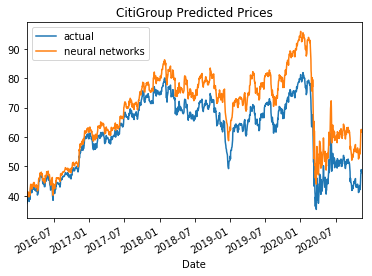

In [312]:
y_test.C.plot(label='actual')
y_pred_df.C.plot(label='neural networks')
#reg_pred_df.C.plot(label='regression')

plt.title('CitiGroup Predicted Prices')
plt.legend()
plt.show()

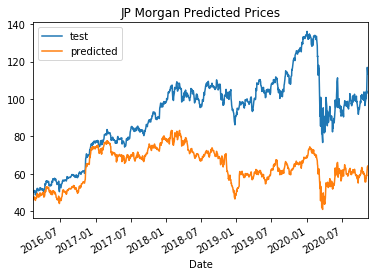

In [313]:
y_test.JPM.plot(label='test')
y_pred_df.JPM.plot(label='predicted')

plt.title('JP Morgan Predicted Prices')
plt.legend()
plt.show()

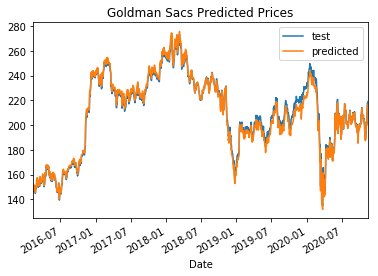

In [314]:
y_test.GS.plot(label='test')
y_pred_df.GS.plot(label='predicted')

plt.title('Goldman Sacs Predicted Prices')
plt.legend()
plt.show()

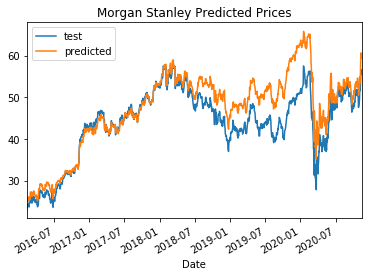

In [315]:
y_test.MS.plot(label='test')
y_pred_df.MS.plot(label='predicted')

plt.title('Morgan Stanley Predicted Prices')
plt.legend()
plt.show()

In [322]:
test_forecast_error = y_test - y_pred
mean_forecast_error = test_forecast_error.mean()
print(mean_forecast_error)

C      -6.807812
GS      0.731781
JPM    27.792222
MS     -3.207648
dtype: float64


In [341]:
predictions_C = pd.DataFrame(predictions)
predictions_C.index = y_test.index
predictions_C.columns = ['C']

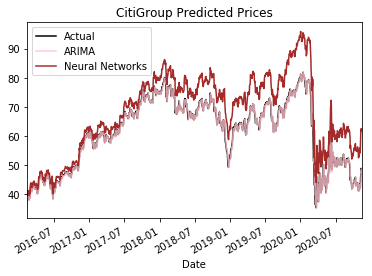

In [355]:
y_test.C.plot(label='Actual', c='black')
predictions_C.C.plot(label = 'ARIMA', c='pink', alpha=0.8)
y_pred_df.C.plot(label='Neural Networks', c='brown')

plt.title('CitiGroup Predicted Prices vs Actual Prices')
plt.legend()
plt.show()

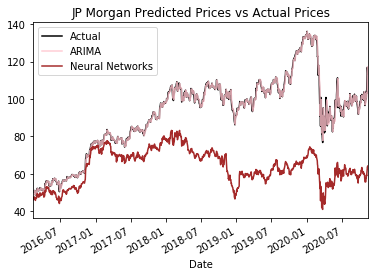

In [357]:
X = portfolio.JPM.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
	model = ARIMA(history, order=(1000,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
    
predictions_JPM = pd.DataFrame(predictions)
predictions_JPM.index = y_test.index
predictions_JPM.columns = ['JPM']

y_test.JPM.plot(label='Actual', c='black')
predictions_JPM.JPM.plot(label = 'ARIMA', c='pink', alpha=0.8)
y_pred_df.JPM.plot(label='Neural Networks', c='brown')

plt.title('JP Morgan Predicted Prices vs Actual Prices')
plt.legend()
plt.show()

In [ ]:
X = portfolio.MS.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
    
predictions_MS = pd.DataFrame(predictions)
predictions_MS.index = y_test.index
predictions_MS.columns = ['MS']

y_test.MS.plot(label='Actual', c='black')
predictions_MS.MS.plot(label = 'ARIMA', c='pink', alpha=0.8)
y_pred_df.MS.plot(label='Neural Networks', c='brown')

plt.title('Morgan Stanley Predicted Prices vs Actual Prices')
plt.legend()
plt.show()

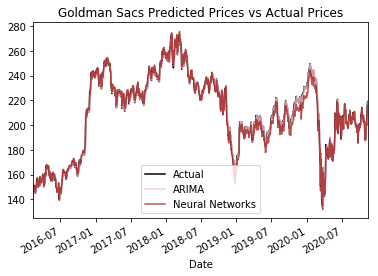

In [368]:
predictions_GS = pd.DataFrame(predictions)
predictions_GS.index = y_test.index
predictions_GS.columns = ['GS']

y_test.GS.plot(label='Actual', c='black')
predictions_GS.GS.plot(label = 'ARIMA', c='pink', alpha=0.8)
y_pred_df.GS.plot(label='Neural Networks', c='brown', alpha=0.8)

plt.title('Goldman Sacs Predicted Prices vs Actual Prices')
plt.legend()
plt.show()

In [386]:
ARIMA_pred_df = pd.concat([predictions_C, predictions_GS, predictions_JPM, predictions_MS], axis=1) 

In [388]:
# Import the CovarianceShrinkage object
from pypfopt.risk_models import CovarianceShrinkage

# Create the CovarianceShrinkage instance variable
cs_actual = CovarianceShrinkage(portfolio)
cs_ARIMA = CovarianceShrinkage(ARIMA_pred_df)
cs_NN = CovarianceShrinkage(y_pred_df)

# Compute the efficient covariance matrix of returns
e_cov = cs_actual.ledoit_wolf()
e_cov_ARIMA = cs_ARIMA.ledoit_wolf()
e_cov_NN = cs_NN.ledoit_wolf()

# Display both the sample covariance_matrix and the efficient e_cov estimate
print("Efficient Covariance Matrix Actual\n", e_cov, "\n")
print("Efficient Covariance Matrix ARIMA\n", e_cov_ARIMA, "\n")
print("Efficient Covariance Matrix NN\n", e_cov_NN, "\n")

Efficient Covariance Matrix Actual
             C        GS       JPM        MS
C    0.279985  0.133172  0.154679  0.178500
GS   0.133172  0.137316  0.106461  0.151068
JPM  0.154679  0.106461  0.152777  0.133869
MS   0.178500  0.151068  0.133869  0.265975 

Efficient Covariance Matrix ARIMA
             C        GS       JPM        MS
C    0.156121  0.097755  0.093571  0.114804
GS   0.097755  0.089722  0.067648  0.088949
JPM  0.093571  0.067648  0.075437  0.078632
MS   0.114804  0.088949  0.078632  0.119353 

Efficient Covariance Matrix NN
             C        GS       JPM        MS
C    0.123882  0.089083  0.087993  0.101259
GS   0.089083  0.102175  0.098562  0.085552
JPM  0.087993  0.098562  0.099983  0.083509
MS   0.101259  0.085552  0.083509  0.098664 



In [398]:
ARIMA_pred_df.info(), y_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1199 entries, 2016-02-12 to 2020-11-13
Data columns (total 4 columns):
C      1199 non-null float64
GS     1199 non-null float64
JPM    1199 non-null float64
MS     1199 non-null float64
dtypes: float64(4)
memory usage: 46.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1199 entries, 2016-02-12 to 2020-11-13
Data columns (total 4 columns):
C      1199 non-null float32
GS     1199 non-null float32
JPM    1199 non-null float32
MS     1199 non-null float32
dtypes: float32(4)
memory usage: 28.1 KB


(None, None)

In [400]:
portfolio_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3996 entries, 2005-01-03 to 2020-11-13
Data columns (total 4 columns):
C      3995 non-null float64
GS     3995 non-null float64
JPM    3995 non-null float64
MS     3995 non-null float64
dtypes: float64(4)
memory usage: 156.1 KB


OrderedDict([('C', 0.0), ('GS', 0.6001728666438816), ('JPM', 0.39982713335611836), ('MS', 0.0)])
OrderedDict([('C', 0.0), ('GS', 0.6001728666438816), ('JPM', 0.39982713335611836), ('MS', 0.0)])
OrderedDict([('C', 0.0), ('GS', 0.6001728666438816), ('JPM', 0.39982713335611836), ('MS', 0.0)])


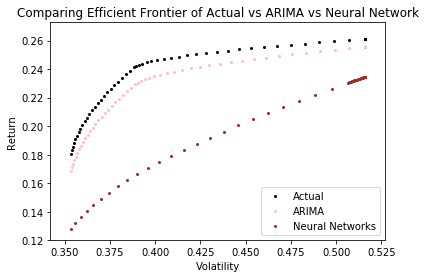

In [401]:
from pypfopt import CLA

# Initialize the Crtical Line Algorithm object
efficient_portfolio_actual = CLA(portfolio_returns['2016-02-12' : '2020-11-13'].mean().dropna()*252, e_cov)
efficient_portfolio_ARIMA = CLA(ARIMA_pred_df.pct_change().mean().dropna()*252, e_cov)
efficient_portfolio_NN = CLA(y_pred_df.pct_change().mean().dropna()*252, e_cov)
# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_actual.min_volatility())
print(efficient_portfolio_ARIMA.min_volatility())
print(efficient_portfolio_NN.min_volatility())
# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_actual.efficient_frontier()
(ret_AR, vol_AR, weights_AR) = efficient_portfolio_ARIMA.efficient_frontier()
(ret_NN, vol_NN, weights_AR) = efficient_portfolio_NN.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s = 4, c = 'black', label = 'Actual')
plt.scatter(vol_AR, ret_AR, s = 4, c = 'pink', label = 'ARIMA')
plt.scatter(vol_NN, ret_NN, s = 4, c = 'brown', label = 'Neural Networks')
plt.legend()
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Comparing Efficient Frontier of Actual vs ARIMA vs Neural Network')
plt.show()

In [402]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

295.6908647811326

In [403]:
mean_squared_error(y_test, ARIMA_pred_df)

5.076748063504878